## In this competition, you’ll simulate a ventilator connected to a sedated patient's lung. 
## The best submissions will take lung attributes compliance and resistance into account.

## Importing required packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Data

In [2]:
df = pd.read_csv(r"E:\Data Science\Project\Ventilation pressure prediction\train.csv")
df.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


#### checking for nulls

In [3]:
df.isnull().sum()

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

In [4]:
df.columns[df.dtypes=='object']

Index([], dtype='object')

In [5]:
# making a copy for backup
df1 = df  

In [6]:
## removing the 'id' column

In [7]:
df = df.iloc[:,2:]

In [8]:
df.head()

,R,C,time_step,u_in,u_out,pressure
0,20,50,0.000000,0.083334,0,5.837492
1,20,50,0.033652,18.383041,0,5.907794
2,20,50,0.067514,22.509278,0,7.876254
3,20,50,0.101542,22.808822,0,11.742872
4,20,50,0.135756,25.355850,0,12.234987


#### correlation

In [9]:
df.corr()

,R,C,time_step,u_in,u_out,pressure
R,1.000000,-0.096070,-0.014535,-0.148120,-0.007594,0.015976
C,-0.096070,1.000000,0.004936,0.151002,0.003720,-0.036727
time_step,-0.014535,0.004936,1.000000,-0.352276,0.839191,-0.524829
u_in,-0.148120,0.151002,-0.352276,1.000000,-0.416985,0.308136
u_out,-0.007594,0.003720,0.839191,-0.416985,1.000000,-0.614910
pressure,0.015976,-0.036727,-0.524829,0.308136,-0.614910,1.000000


(array([1.504040e+05, 4.133107e+06, 6.762010e+05, 4.967310e+05,
        3.656900e+05, 1.638900e+05, 3.459900e+04, 1.002400e+04,
        3.101000e+03, 2.253000e+03]),
 array([-1.89574429,  4.77592931, 11.44760291, 18.11927652, 24.79095012,
        31.46262372, 38.13429733, 44.80597093, 51.47764453, 58.14931814,
        64.82099174]),
 <BarContainer object of 10 artists>)

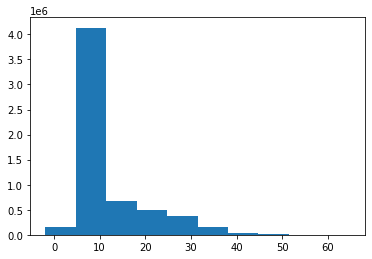

In [10]:
plt.hist(df.pressure)

### Finding outliers through boxplot

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pressure'>

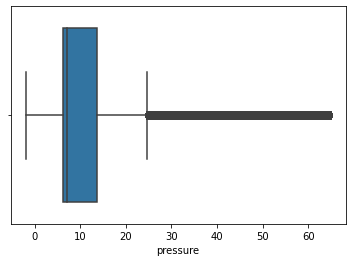

In [11]:
sns.boxplot(df.pressure)

In [12]:
df.R.value_counts()

50    2410080
5     1988800
20    1637120
Name: R, dtype: int64

In [14]:
outlier=0
l=[]
for i in range (0, 6036000):
    if df.pressure[i]<=25:
        l.append(i)

    if df.pressure[i]>25:
        outlier = outlier+1
print("Total Outliers= ",outlier)

Total Outliers=  561630


In [16]:
np.size(l)

5474370

In [17]:
df = df.iloc[l, :]

In [18]:
df.shape

(5474370, 6)

### sampling

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [20]:
train_x= train.iloc[:, 0:-1]
train_y= train.iloc[:, -1]

test_x= test.iloc[:, 0:-1]
test_y= test.iloc[:, -1]

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
lr.fit(train_x, train_y)

LinearRegression()

In [23]:
## Rsquare
lr.score(train_x, train_y)

0.42683892330636064

In [24]:
##Adjusted Rsquare value
Rsqu=lr.score(train_x,train_y)
N=train_x.shape[0]
K=train_x.shape[1]

AdjRsqu = 1-(1-Rsqu)*(N-1)/(N-K-1)
print("Ajusted Rsquare = ",AdjRsqu)

Ajusted Rsquare =  0.4268382689367004


In [25]:
pred_lr = lr.predict(test_x)

In [26]:
from sklearn.metrics import mean_absolute_error,  mean_absolute_percentage_error

In [27]:
mean_absolute_error(test_y, pred_lr)

2.347650045183655

In [28]:
mape_lr = mean_absolute_percentage_error(test_y, pred_lr)
mape_lr

0.3948435282576692

#### Decision tree regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [30]:
dt.fit(train_x, train_y)

DecisionTreeRegressor()

In [31]:
dt.score(train_x, train_y)

0.9959019842279383

In [32]:
pred_dt = dt.predict(test_x)

In [33]:
mean_absolute_error(test_y, pred_dt)

1.4512634595725276

In [34]:
mape_dt = mean_absolute_percentage_error(test_y, pred_dt)
mape_dt

0.2539242159398286

#### Hyper tuning

In [35]:
from sklearn.model_selection import GridSearchCV
search_dict = { 'max_depth' : [4,5,6,7,8,9,10],
             'min_samples_split' : [300,400,500]   }


In [36]:
grid = GridSearchCV(dt, param_grid= search_dict)

In [37]:
grid.fit(train_x, train_y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [300, 400, 500]})

In [38]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_split=300)

In [39]:
dt1 = DecisionTreeRegressor( max_depth=10, min_samples_split=300)

In [40]:
dt1.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=10, min_samples_split=300)

In [41]:
dt1.score(train_x, train_y)

0.7900618123451308

In [42]:
pred_dt1 = dt1.predict(test_x)

In [43]:
mean_absolute_error(test_y, pred_dt1)

1.2693626497771584

In [44]:
mape_dt1 = mean_absolute_percentage_error(test_y, pred_dt1)
mape_dt1

0.2600137058620138

In [45]:
## checking for train and test data 

In [46]:
## on train data

In [47]:
pred_train = lr.predict(train_x)

In [48]:
mean_absolute_error(train_y, pred_train)

2.3481892320987146

In [49]:
mean_absolute_percentage_error(train_y, pred_train)

0.3575314544310655

In [50]:
## on test data

In [51]:
mean_absolute_error(test_y, pred_lr)

2.347650045183655

In [52]:
mean_absolute_percentage_error(test_y, pred_lr)

0.3948435282576692

In [53]:
## not huge difference hence its not required to use Ridge and Lasso

#### CatBoostRegressor 

In [55]:
from catboost import CatBoostRegressor
cbc = CatBoostRegressor(max_depth=16,loss_function='MAPE')

In [56]:
cbc.fit(train_x, train_y)

0:	learn: 0.2408827	total: 6.19s	remaining: 1h 43m 5s
1:	learn: 0.2375280	total: 8.38s	remaining: 1h 9m 39s
2:	learn: 0.2343522	total: 10.5s	remaining: 58m 25s
3:	learn: 0.2311945	total: 12.8s	remaining: 52m 57s
4:	learn: 0.2284054	total: 15s	remaining: 49m 41s
5:	learn: 0.2256438	total: 17.2s	remaining: 47m 21s
6:	learn: 0.2228690	total: 19.1s	remaining: 45m 13s
7:	learn: 0.2203893	total: 21.1s	remaining: 43m 36s
8:	learn: 0.2179513	total: 23.1s	remaining: 42m 19s
9:	learn: 0.2157466	total: 25s	remaining: 41m 15s
10:	learn: 0.2134066	total: 27s	remaining: 40m 25s
11:	learn: 0.2112253	total: 28.9s	remaining: 39m 40s
12:	learn: 0.2088544	total: 30.9s	remaining: 39m 7s
13:	learn: 0.2064415	total: 32.9s	remaining: 38m 33s
14:	learn: 0.2042508	total: 34.9s	remaining: 38m 9s
15:	learn: 0.2021449	total: 36.9s	remaining: 37m 48s
16:	learn: 0.1999823	total: 38.9s	remaining: 37m 31s
17:	learn: 0.1983106	total: 40.8s	remaining: 37m 8s
18:	learn: 0.1962027	total: 42.8s	remaining: 36m 48s
19:	lear

In [57]:
cbc.score(train_x, train_y)

0.7201499076832651

In [58]:
pred_cbc = cbc.predict(test_x)

In [59]:
mean_absolute_error(test_y, pred_cbc)

1.2883675939649635

In [60]:
mape_cbc = mean_absolute_percentage_error(test_y, pred_cbc)
mape_cbc

0.2131019316843711

### Comparing MAPE values we got

In [61]:
data = pd.DataFrame({'Algorithm':['linear Regression', 'Decision Tree', 'Deciosion Tree hypertuned', 'Cataboost Regressor' ], 'MAPE':[mape_lr, mape_dt, mape_dt1, mape_cbc]})

In [62]:
data

,Algorithm,MAPE
0,linear Regression,0.394844
1,Decision Tree,0.253924
2,Deciosion Tree hypertuned,0.260014
3,Cataboost Regressor,0.213102
